## Tutorial 1: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

### Overview
> 1. Installing the Python and SciPy platform.
> 2. Loading the dataset.
> 3. Summarizing the dataset.
> 4. Visualizing the dataset.
> 5. Evaluating some algorithms.
> 6. Making some predictions.


## 1. Installing the Python and SciPy platform

#### SciPy is a python library used for scientific computing (https://www.scipy.org/).

#### 5 SciPy required libraries 
> - scipy
> - numpy
> - matplotlib
> - pandas
> - sklearn


In [2]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 2.7.14 |Anaconda, Inc.| (default, Dec  7 2017, 17:05:42) 
[GCC 7.2.0]
scipy: 1.0.0
numpy: 1.14.0
matplotlib: 2.1.2
pandas: 0.22.0
sklearn: 0.19.1


## 2. Load The Data

In [3]:
#2.1 Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
#2.2 Load dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv("../dataset/iris.data", names=names)

### 3. Summarize the Dataset

In [5]:
#3.1. Peek at the dataset
dataset.head()

sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [6]:
#3.2. Dimensions of the dataset
#(total number of rows, total number of colums)
dataset.shape

(150, 5)

In [7]:
#3.3. Statistical summary
dataset.describe()

sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [8]:
#3.4. Class Distribution
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### 4. Data Visualization

#### We are going to look at two types of plots:
> 1. Univariate plots to better understand each attribute.
> 2. Multivariate plots to better understand the relationships between attributes.


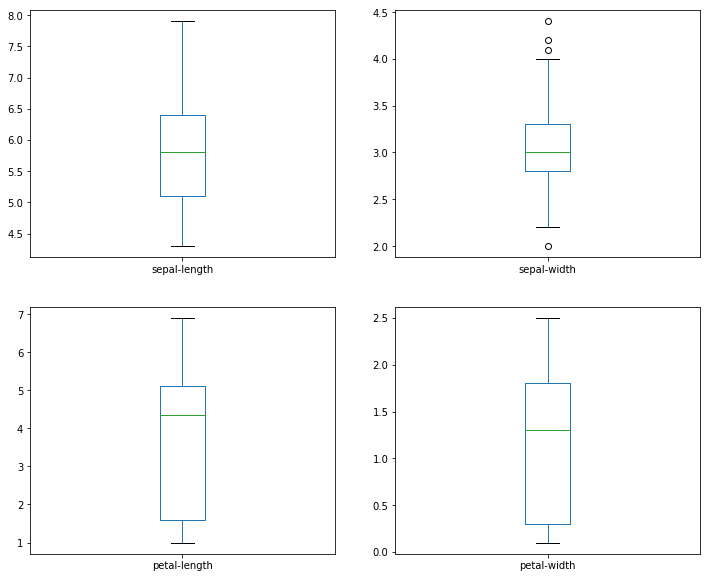

In [9]:
#4.1. Univariate plots
#4.1.1 box and whisker plots
#figsize=(width, height))
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12,10))
plt.show()

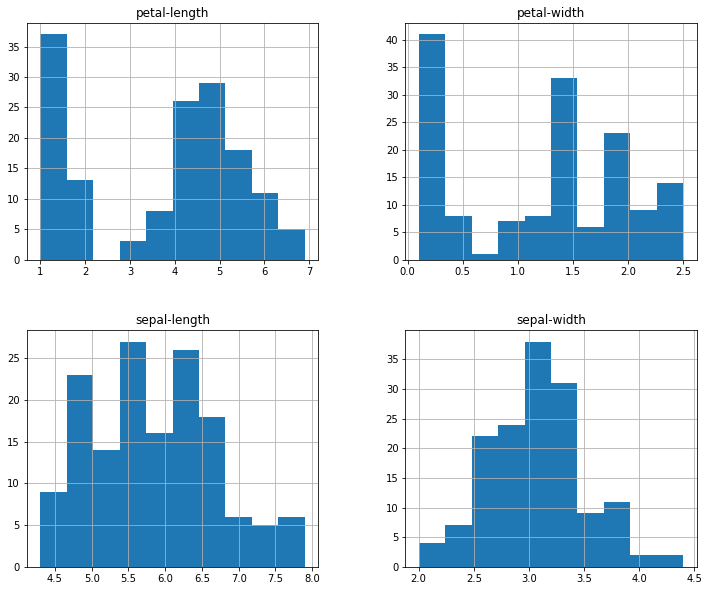

In [10]:
#4.1.2 histograms
dataset.hist(figsize=(12, 10))
plt.show()

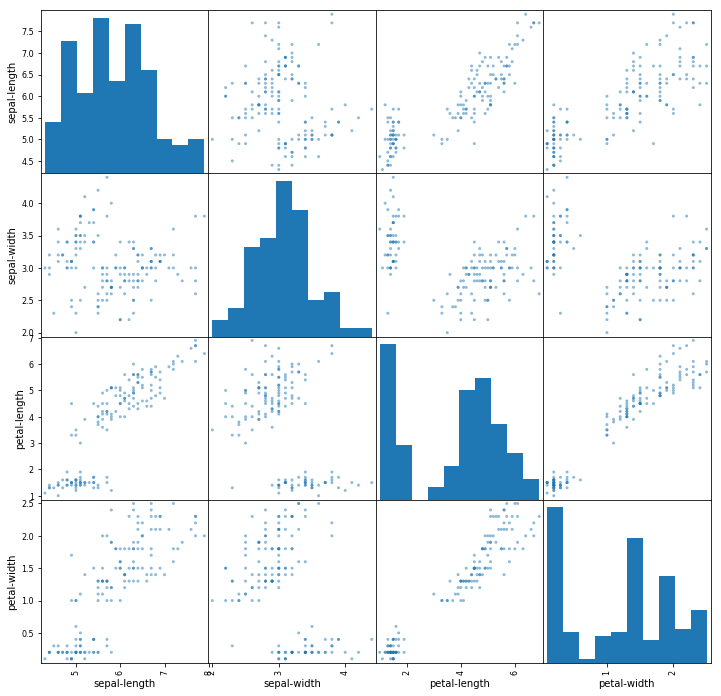

In [11]:
#4.2 Multivariate Plots
#scatter plot matrix
scatter_matrix(dataset, figsize=(12, 12))
plt.show()

### 5. Evaluate Some Algorithms

#### Cover the following:
> 1. Create a validation dataset.
> 2. Set-up the test harness to use 10-fold cross validation.
> 3. Build 5 different models to predict species from flower measurements
> 4. Select the best model.


In [13]:
#5.1 Create a validation dataset

# Split-out validation dataset
array = dataset.values
row, column
start_row:end_row, start_col:end_col
        
X = array[:, 0:4] #array[start_row:end_row, start_col:end_col]
Y = array[:, 4] #last column: class

validation_size = 0.20 #train size = 80%, test/validation size=20%
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [16]:
#5.2 Test Harness

#We will use 10-fold cross validation to estimate accuracy.
#This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

# Test options and evaluation metric
seed = 7
scoring = 'accuracy' #We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

In [17]:
#5.3. Build Prediction Model

#Evaluate 6 different algorithms:
    #Logistic Regression (LR)
    #Linear Discriminant Analysis (LDA)
    #K-Nearest Neighbors (KNN).
    #Classification and Regression Trees (CART).
    #Gaussian Naive Bayes (NB).
    #Support Vector Machines (SVM).

#Simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.


# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


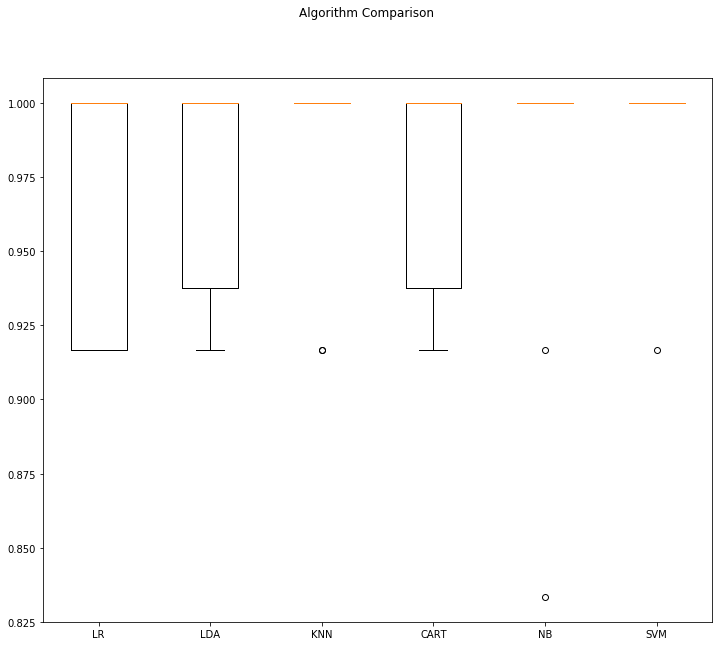

In [20]:
#5.4. Select Best Model

# Compare Algorithms
fig = plt.figure(figsize=(12,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 6. Make Predictions

#### KNN is the better model

In [21]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

predictions = knn.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30

